# <font color=blue > Name : </font>     <font color=green > Mohammed  Basheer </font> 
# <font color=blue > University  : </font>     <font color=green > University College of Applied Sciences<font color=Orange >  "UCAS" </font> 

___________________________________________________________________________________________________________________________

# <font color=Orange > Charles Book Club </font> 



This data set represents information associated with individuals who are members of a book club





# Description of Variables:

Seq#: Sequence number in the partition

ID#: Identification number in the full (unpartitioned) market test data set

Gender: O=Male 1=Female

M: Monetary- Total money spent on books

R: Recency- Months since last purchase

F: Frequency - Total number of purchases

FirstPurch: Months since first purchase

ChildBks: Number of purchases from the category: Child books

YouthBks: Number of purchases from the category: Youth books

CookBks: Number of purchases from the category: Cookbooks

DoItYBks: Number of purchases from the category: Do It Yourself books I

RefBks: Number of purchases from the category: Reference books (Atlases, Encyclopedias, Dictionaries)

ArtBks: Number of purchases from the category: Art books

GeoBks: Number of purchases from the category: Geography books

ItalCook: Number of purchases of book title: "Secrets of Italian Cooking"

ItalAtlas: Number of purchases of book title: "Historical Atlas of Italy"

ItalArt: Number of purchases of book title: "Italian Art"

Florence: =1 if 'The Art History of Florence" was bought, = 0 if not

Related purchase: Number of related books purchased 



____________________________________________________________________________________________________________________________

# Import the libraries

In [339]:
# Import pandas.
import pandas as pd

# Import numpy.
import numpy as np

# Import matplotlib.
import matplotlib.pyplot as plt

# Import seaborn.
import seaborn as sns

# Import regular expression.
import re

# import datetime.
import datetime as dt

#import seaborn 
import seaborn as sns

#import plotly 

import plotly.graph_objects as go

import plotly.express as px

from plotly.subplots import make_subplots

from sklearn.cluster import KMeans

# Explore the data

In [291]:
df = pd.read_csv('CBC.csv')
df.head()

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeoBks,ItalCook,ItalAtlas,ItalArt,Florence,Related purchase
0,1,25,1,297,14,2,22,0,1,1,0,0,0,0,0,0,0,0,0
1,2,29,0,128,8,2,10,0,0,0,0,0,0,0,0,0,0,0,0
2,3,46,1,138,22,7,56,2,1,2,0,1,0,1,1,0,0,0,2
3,4,47,1,228,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0
4,5,51,1,257,10,1,10,0,0,0,0,0,0,0,0,0,0,0,0


In [292]:
# # Display the first few rows of the dataset
df.shape

(4000, 19)

In [293]:
df.head()

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeoBks,ItalCook,ItalAtlas,ItalArt,Florence,Related purchase
0,1,25,1,297,14,2,22,0,1,1,0,0,0,0,0,0,0,0,0
1,2,29,0,128,8,2,10,0,0,0,0,0,0,0,0,0,0,0,0
2,3,46,1,138,22,7,56,2,1,2,0,1,0,1,1,0,0,0,2
3,4,47,1,228,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0
4,5,51,1,257,10,1,10,0,0,0,0,0,0,0,0,0,0,0,0


In [294]:
df.columns

Index(['Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'ChildBks',
       'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeoBks',
       'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence', 'Related purchase'],
      dtype='object')

In [295]:
 # Generate summary statistics of numerical columns
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Seq#              4000 non-null   int64
 1   ID#               4000 non-null   int64
 2   Gender            4000 non-null   int64
 3   M                 4000 non-null   int64
 4   R                 4000 non-null   int64
 5   F                 4000 non-null   int64
 6   FirstPurch        4000 non-null   int64
 7   ChildBks          4000 non-null   int64
 8   YouthBks          4000 non-null   int64
 9   CookBks           4000 non-null   int64
 10  DoItYBks          4000 non-null   int64
 11  RefBks            4000 non-null   int64
 12  ArtBks            4000 non-null   int64
 13  GeoBks            4000 non-null   int64
 14  ItalCook          4000 non-null   int64
 15  ItalAtlas         4000 non-null   int64
 16  ItalArt           4000 non-null   int64
 17  Florence          4000 non-null  

In [296]:
df.isna().sum()

Seq#                0
ID#                 0
Gender              0
M                   0
R                   0
F                   0
FirstPurch          0
ChildBks            0
YouthBks            0
CookBks             0
DoItYBks            0
RefBks              0
ArtBks              0
GeoBks              0
ItalCook            0
ItalAtlas           0
ItalArt             0
Florence            0
Related purchase    0
dtype: int64

In [297]:
df.isna().sum().any()

False

In [298]:
df.describe()

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeoBks,ItalCook,ItalAtlas,ItalArt,Florence,Related purchase
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,16594.623000,0.704500,208.091500,13.390500,3.833250,26.50725,0.639750,0.30475,0.731250,0.350750,0.256250,0.28900,0.387500,0.125250,0.037500,0.045750,0.084500,0.885000
std,1154.844867,9484.433792,0.456324,100.948548,8.103822,3.458386,18.35138,0.994343,0.61194,1.089413,0.687999,0.558269,0.60089,0.750656,0.385486,0.214721,0.220611,0.278171,1.226234
min,1.000000,25.000000,0.000000,15.000000,2.000000,1.000000,2.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1000.750000,8253.250000,0.000000,129.000000,8.000000,1.000000,12.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2000.500000,16581.000000,1.000000,208.000000,12.000000,2.000000,20.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3000.250000,24838.250000,1.000000,283.000000,16.000000,6.000000,36.00000,1.000000,0.00000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4000.000000,32977.000000,1.000000,479.000000,36.000000,12.000000,99.00000,7.000000,5.00000,7.000000,5.000000,4.000000,5.00000,6.000000,3.000000,2.000000,2.000000,1.000000,8.000000


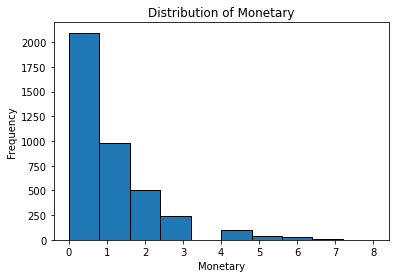

In [299]:
# Histogram of Monetary (Total money spent on books)

plt.hist(df['Related purchase'], bins=10, edgecolor='black')

plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Distribution of Monetary')
plt.show()


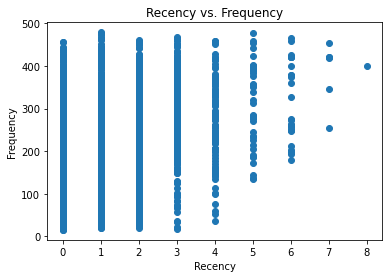

In [300]:
# Scatter plot of Recency vs. Frequency

plt.scatter(df['Related purchase'], df['M'])

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs. Frequency')
plt.show()

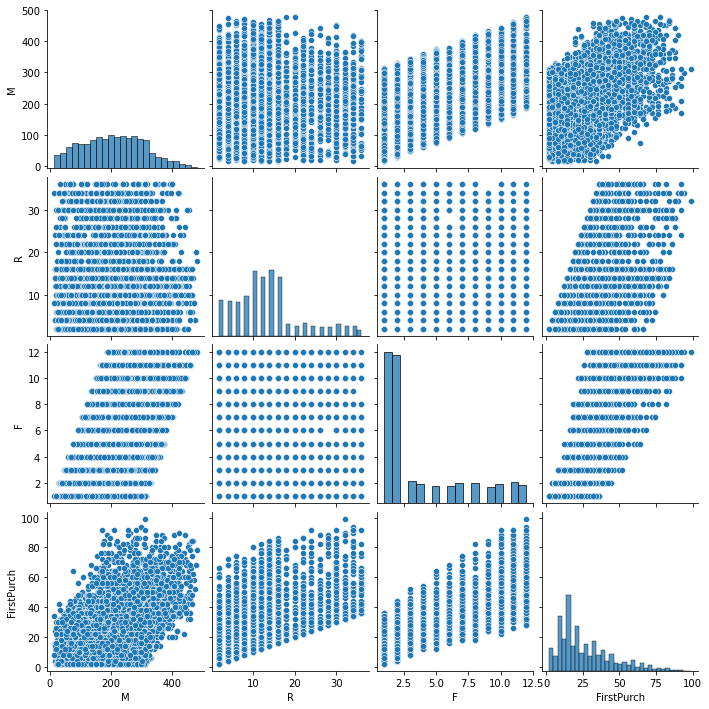

In [301]:
# Pairplot: A graph that displays the relationship between all possible pairs of numerical variables
# in the form of a matrix of graphs.

numeric_columns = ['M', 'R', 'F', 'FirstPurch']
data_numeric = df[numeric_columns]

sns.pairplot(data_numeric)
plt.show()


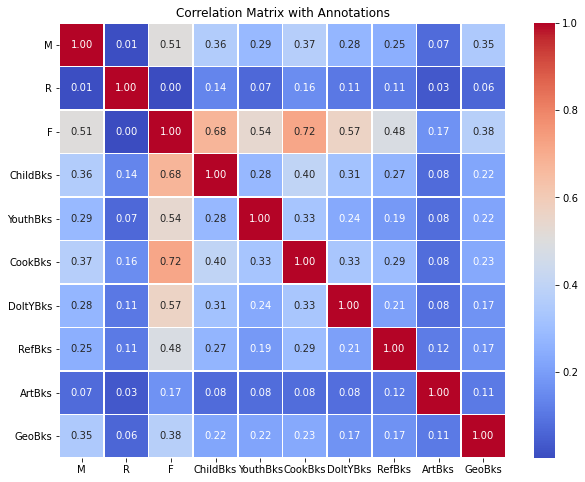

In [302]:
# Heatmap with Annotations: A graph that displays the correlation matrix between all numerical variables
# and includes labels for the values to show the strength and direction of the relationships.


numeric_vars = ['M', 'R', 'F', 'ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeoBks']

correlation_matrix = df[numeric_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix with Annotations')
plt.show()


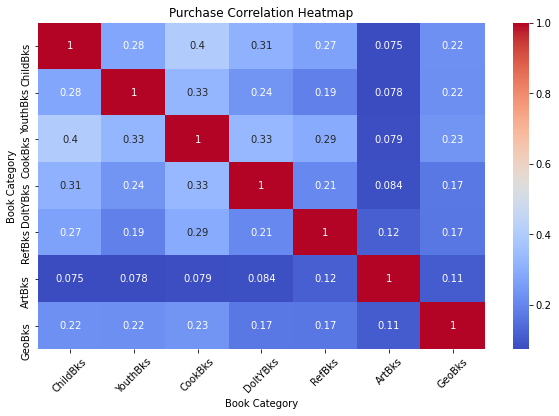

In [303]:
# Heatmap of Purchase Correlation: A heatmap that displays the correlation matrix among all categories of books.

category_columns = ['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeoBks']
correlation_matrix =df[category_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.xlabel('Book Category')
plt.ylabel('Book Category')
plt.title('Purchase Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()


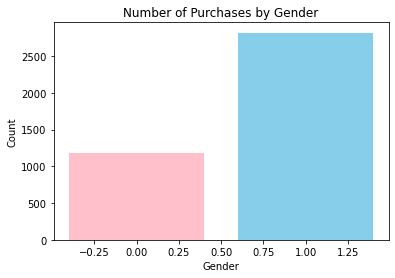

In [304]:
# Bar Plot by Gender: A graph of the number of purchases made by gender.

gender_counts = df['Gender'].value_counts()
colors = ['skyblue', 'pink'] 

plt.bar(gender_counts.index, gender_counts.values,color=colors)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Purchases by Gender')
plt.show()

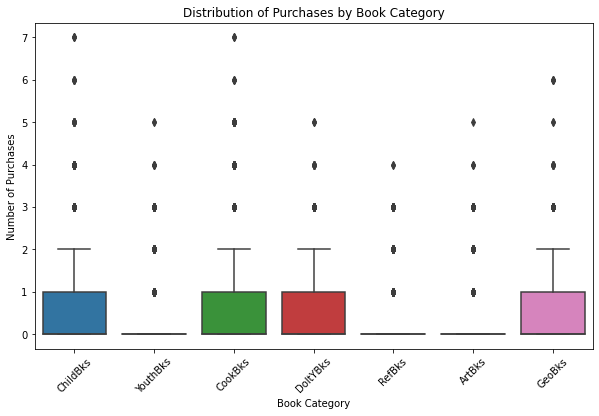

In [305]:
# Box Plot by Category: A graphic of the distribution of values for each category of books.

category_columns = ['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeoBks']
data_categories = df[category_columns]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_categories)
plt.xlabel('Book Category')
plt.ylabel('Number of Purchases')
plt.title('Distribution of Purchases by Book Category')
plt.xticks(rotation=45)
plt.show()


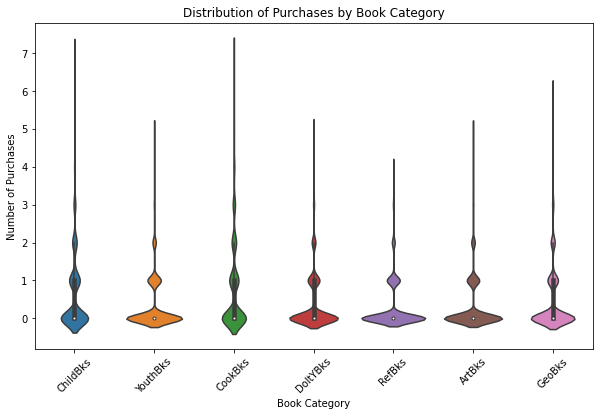

In [306]:
# Violin Plot by Category: A graph showing the distribution of values and intensity for each category of book.

category_columns = ['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeoBks']
data_categories = df[category_columns]

plt.figure(figsize=(10, 6))
sns.violinplot(data=data_categories)
plt.xlabel('Book Category')
plt.ylabel('Number of Purchases')
plt.title('Distribution of Purchases by Book Category')
plt.xticks(rotation=45)
plt.show()


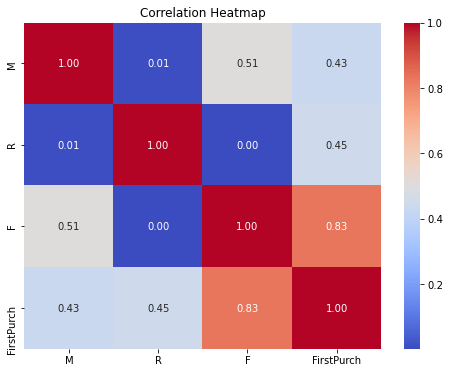

In [307]:
# Correlation Heatmap: A graph showing the correlation matrix between all numerical variables 
# with the degree of correlation indicated in different colours.

correlation_matrix = data_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


<Figure size 720x432 with 0 Axes>

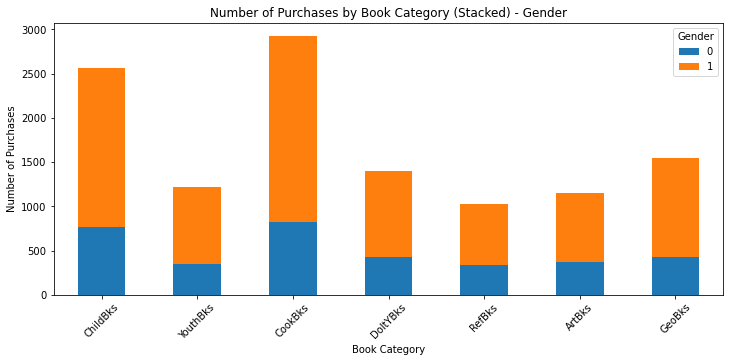

In [308]:
# Stacked Bar Plot by Gender: A stacked graph showing the number of purchases by different categories,
# and distinguishing between males and females.

gender_category_counts = df.groupby('Gender')[category_columns].sum()

plt.figure(figsize=(10, 6))
gender_category_counts.transpose().plot(kind='bar', stacked=True, figsize=(12,5))
plt.xlabel('Book Category')
plt.ylabel('Number of Purchases') 
plt.title('Number of Purchases by Book Category (Stacked) - Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


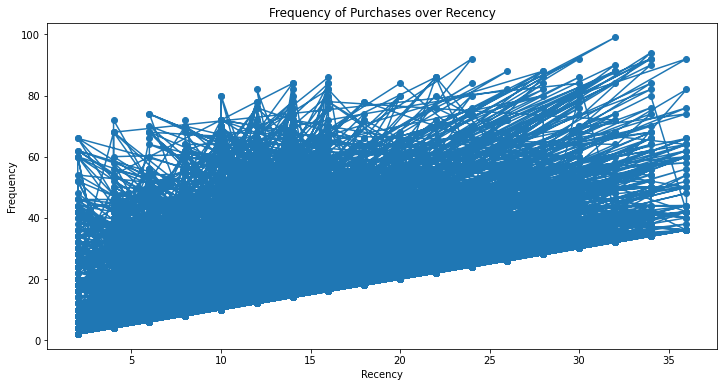

In [309]:
# Line Plot: A graph showing the evolution of the number of purchases over time

plt.figure(figsize=(12, 6))
plt.plot(df['R'], df['FirstPurch'], marker='o')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Frequency of Purchases over Recency')
plt.show()


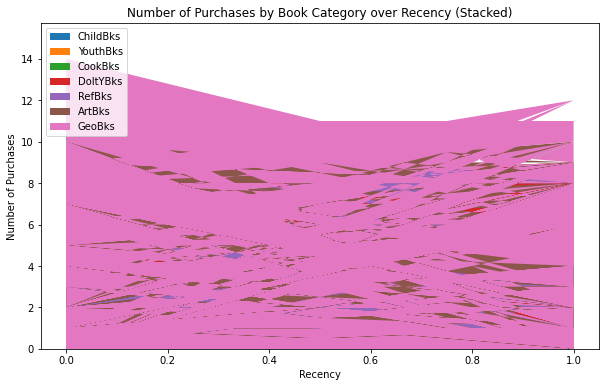

In [310]:
#  A graph showing the distribution of the number of purchases by different categories over a period of time

category_columns = ['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeoBks']
data_categories = df[category_columns]

plt.figure(figsize=(10, 6))
plt.stackplot(df['Florence'], data_categories.transpose(), labels=category_columns)
plt.xlabel('Recency')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases by Book Category over Recency (Stacked)')
plt.legend(loc='upper left')
plt.show()


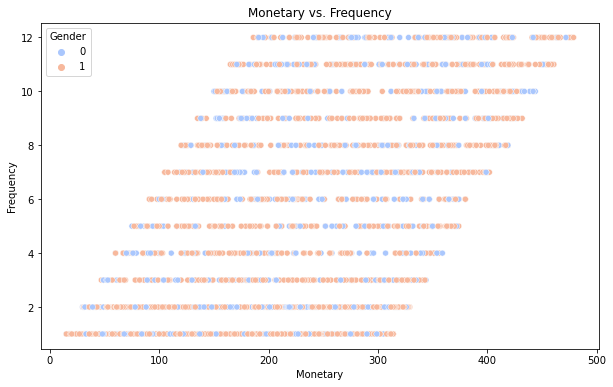

In [311]:
# Scatter Plot of Monetary vs. Monetary. Frequency: A score graph showing the relationship
# between money spent and purchase frequency.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='M', y='F', hue='Gender', palette='coolwarm')

plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary vs. Frequency')
plt.legend(title='Gender')
plt.show()


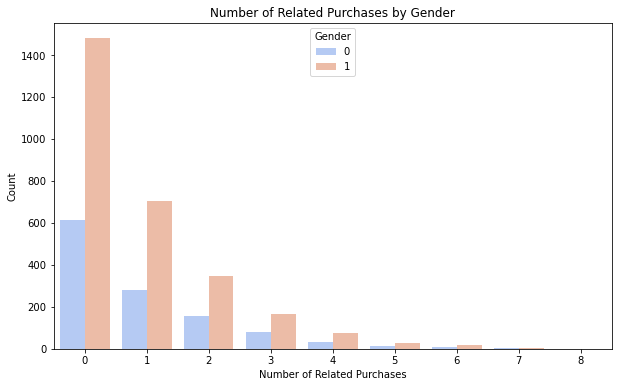

In [312]:
# Bar Plot of Related Purchases: A graph showing the number of related purchases.

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Related purchase', hue='Gender', palette='coolwarm')

plt.xlabel('Number of Related Purchases')
plt.ylabel('Count')
plt.title('Number of Related Purchases by Gender')
plt.legend(title='Gender')
plt.show()


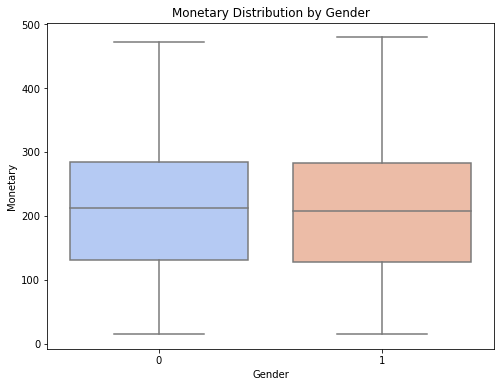

In [313]:
# Box Plot of Monetary by Gender: A box plot showing the distribution of monetary values based on gender.

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='M', palette='coolwarm')
plt.xlabel('Gender')
plt.ylabel('Monetary')
plt.title('Monetary Distribution by Gender')
plt.show()


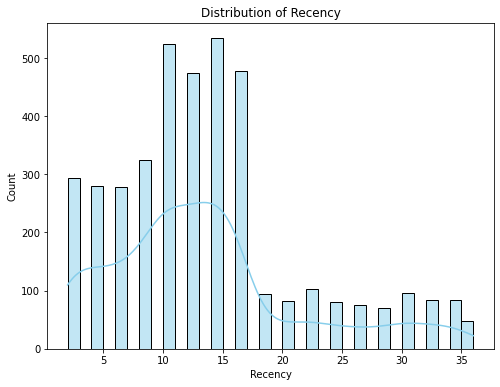

In [314]:
# Histogram of Recency: A graphic showing the distribution of the duration (Recency) by buying

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='R', kde=True, color='skyblue')
plt.xlabel('Recency')
plt.ylabel('Count')
plt.title('Distribution of Recency')
plt.show()


# Assignment 1

In [315]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_data, val_data = train_test_split(df, test_size=0.4, random_state=1)


In [316]:
response_rate_training = train_data['Florence'].mean()
print(f"the response rate for the training data customers as a whole {[response_rate_training]}" )

the response rate for the training data customers as a whole [0.08833333333333333]


In [317]:
response_rates_combinations = {}

for r in range(1, 5):
    for f in range(1, 6):
        for m in range(1, 4):
            combination = str(r) + str(f) + str(m)
            subset = train_data[(train_data['R'] == r) & (train_data['F'] == f) & (train_data['M'] == m)]
            response_rate = subset['Florence'].mean()
            response_rates_combinations[combination] = response_rate


In [318]:
combinations_above_overall = [combination for combination, response_rate in response_rates_combinations.items() if response_rate > response_rate_training]


In [319]:
print("Response rate for the training data customers as a whole:", response_rate_training)

print("\nResponse rates for each combination of RFM categories:")
for combination, response_rate in response_rates_combinations.items():
    print(f"Combination {combination}: {response_rate}")

print("\nCombinations with response rates above the overall response in the training data:")
for combination in combinations_above_overall:
    print(combination)


Response rate for the training data customers as a whole: 0.08833333333333333

Response rates for each combination of RFM categories:
Combination 111: nan
Combination 112: nan
Combination 113: nan
Combination 121: nan
Combination 122: nan
Combination 123: nan
Combination 131: nan
Combination 132: nan
Combination 133: nan
Combination 141: nan
Combination 142: nan
Combination 143: nan
Combination 151: nan
Combination 152: nan
Combination 153: nan
Combination 211: nan
Combination 212: nan
Combination 213: nan
Combination 221: nan
Combination 222: nan
Combination 223: nan
Combination 231: nan
Combination 232: nan
Combination 233: nan
Combination 241: nan
Combination 242: nan
Combination 243: nan
Combination 251: nan
Combination 252: nan
Combination 253: nan
Combination 311: nan
Combination 312: nan
Combination 313: nan
Combination 321: nan
Combination 322: nan
Combination 323: nan
Combination 331: nan
Combination 332: nan
Combination 333: nan
Combination 341: nan
Combination 342: nan
Combi

# Assignment 2

In [320]:
avg_r = train_data['R'].mean()
avg_f = train_data['F'].mean()
avg_m = train_data['M'].mean()

filtered_val_data = val_data[(val_data['R'] > avg_r) & (val_data['F'] > avg_f) & (val_data['M'] > avg_m)]


In [321]:
response_rate_validation = filtered_val_data['Florence'].mean()


In [322]:
print("Response rate in the validation data using 'above-average' RFM combinations:", response_rate_validation)


Response rate in the validation data using 'above-average' RFM combinations: 0.09444444444444444


# Assignment 3

In [324]:
rfm = df.filter(["ID#","R","F","M"])
rfm.head()

,ID#,R,F,M
0,25,14,2,297
1,29,8,2,128
2,46,22,7,138
3,47,2,1,228
4,51,10,1,257


In [325]:
rfm = rfm[rfm["M"] > 0]
rfm

,ID#,R,F,M
0,25,14,2,297
1,29,8,2,128
2,46,22,7,138
3,47,2,1,228
4,51,10,1,257
...,...,...,...,...
3995,32950,2,2,141
3996,32954,16,9,357
3997,32955,12,1,48
3998,32976,14,7,214


In [326]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
ID#,4000.0,16594.62300,9484.433792,25.0,8253.25,16581.0,24838.25,32977.0
R,4000.0,13.39050,8.103822,2.0,8.00,12.0,16.00,36.0
F,4000.0,3.83325,3.458386,1.0,1.00,2.0,6.00,12.0
M,4000.0,208.09150,100.948548,15.0,129.00,208.0,283.00,479.0


In [327]:
rfm["R_score"] = pd.qcut(rfm["R"] , 5 , labels=[5,4,3,2,1])

In [328]:
rfm["F_score"] = pd.qcut(rfm["F"].rank(method="first"),5,labels=[1,2,3,4,5])

In [329]:
rfm["M_score"] = pd.qcut(rfm["M"],5,labels=[1,2,3,4,5])

In [331]:
rfm.head()

,ID#,R,F,M,R_score,F_score,M_score
0,25,14,2,297,3,2,4
1,29,8,2,128,4,2,2
2,46,22,7,138,1,4,2
3,47,2,1,228,5,1,3
4,51,10,1,257,4,1,4


In [332]:
rfm["RFM_score"] = (rfm["R_score"].astype(str)+rfm["F_score"].astype(str))

In [333]:
rfm.head()

,ID#,R,F,M,R_score,F_score,M_score,RFM_score
0,25,14,2,297,3,2,4,32
1,29,8,2,128,4,2,2,42
2,46,22,7,138,1,4,2,14
3,47,2,1,228,5,1,3,51
4,51,10,1,257,4,1,4,41


In [334]:
seg_map = {
    r'[1-2][1-2]': "hibernating",
    r'[1-2][3-4]': "at_Risk",
    r'[1-2]5': "cant_loose",
    r'3[1-2]': "about_to_sleep",
    r'33': "need_attenttion",
    r'[3-4][4-5]': "loyal_customers",
    r'41': "promising",
    r'51': "new_customers",
    r'[4-5][2-3]': "potential_loyalists",
    r'5[4-5]': "champions",

}
rfm["segment"] = rfm["RFM_score"].replace(seg_map,regex=True)
rfm.head()

,ID#,R,F,M,R_score,F_score,M_score,RFM_score,segment
0,25,14,2,297,3,2,4,32,about_to_sleep
1,29,8,2,128,4,2,2,42,potential_loyalists
2,46,22,7,138,1,4,2,14,at_Risk
3,47,2,1,228,5,1,3,51,new_customers
4,51,10,1,257,4,1,4,41,promising


In [335]:
rfm[["segment","R","F","M"]].groupby("segment").agg(["mean","count","max"]).round()

R               F                M           
                     mean count max  mean count max   mean count  max
segment                                                              
about_to_sleep       13.0   403  14   1.0   403   2  169.0   403  329
at_Risk              22.0   517  36   3.0   517   7  207.0   517  402
cant_loose           23.0   250  36  10.0   250  12  292.0   250  479
champions             4.0   352   6   7.0   352  12  254.0   352  475
hibernating          22.0   525  36   1.0   525   2  169.0   525  327
loyal_customers      11.0   735  14   7.0   735  12  263.0   735  472
need_attenttion      13.0   209  14   2.0   209   2  177.0   209  325
new_customers         4.0   158   6   1.0   158   1  161.0   158  311
potential_loyalists   6.0   661  10   2.0   661   2  176.0   661  329
promising             9.0   190  10   1.0   190   1  177.0   190  314

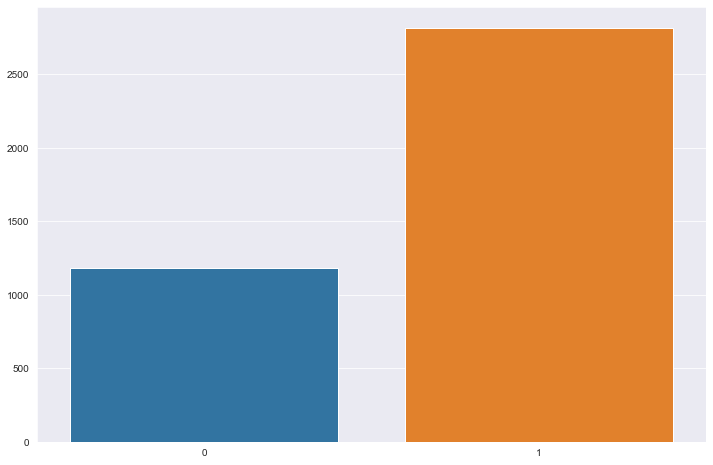

In [338]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [341]:
X = df.iloc[:,[6]].values
X

array([[22],
       [10],
       [56],
       ...,
       [12],
       [38],
       [12]], dtype=int64)

In [343]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

C:\Users\Subeh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Subeh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Subeh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Subeh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Subeh\anaconda3\lib\site-packages\sklearn\clust

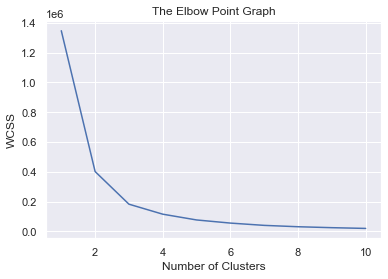

In [360]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()


In [345]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

C:\Users\Subeh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[4 1 3 ... 1 0 1]


In [346]:
X = df.drop(['M'], axis=1)
y = df['M']

In [347]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [348]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [350]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
classifier = knn_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.07      0.33      0.11         3
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         3
          20       0.00      0.00      0.00         3
          21       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         3
          24       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         2
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         1
          31   

C:\Users\Subeh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Subeh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Subeh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Subeh\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [358]:
print(accuracy_score(y_test, y_pred))

0.00625


# LogisticRegression

In [356]:
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("CBC.csv")

def classification_model(model, data, predictors, outcome):
  
    X = data[predictors]
    y = data[outcome]
  
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)
  
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    return accuracy
    
model = LogisticRegression()
predictor_var = ['Gender', 'M', 'R', 'F', 'FirstPurch', 'ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeoBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Related purchase']
outcome_var = 'Florence'

scoring = []
for i in range(10):
    classification_model(model, df,predictor_var,outcome_var)
    scoring.append(classification_model(model, df,predictor_var,outcome_var))
    
print(np.mean(scoring))

C:\Users\Subeh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Subeh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.9158333333333333


C:\Users\Subeh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Subeh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [357]:
print(np.mean(scoring))

0.9158333333333333
